**Problem 1. Monte-Carlo integration**

**a)** Consider the integral
$$ I = \int_{a}^{b} f(x) \,dx $$
The Monte-Carlo estimator for $I$ is given by
$$ I_N = V \langle f \rangle_N = \frac{V}{N}\sum_{i=1}^N f(x_i), \quad I_N \rightarrow I \quad {N\to \infty}$$

where the $x_i$ are random numbers in the range $[a, b)$, sampled according to a uniform distribution, and $V = b-a$ is the integration volume. The estimator for the standard error of $I_N$ is given by
$$\sigma_N = \sqrt{\frac{\langle f^2 \rangle_N - \langle f \rangle^2_N  }{N-1}}$$

Implement a Monte-Carlo integrator for $f(x) = x^4$, using the parameters $a = 0$, $b = 1$ and $N = 1000$, and report your results for $I_N$ and $\sigma_N$. How many multiples of $\sigma_N$ are between your result of $I_N$ and the exact result for $I$? What does this mean?
(4 points)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# integrand function
f = lambda x: np.power(x, 4)

# parameters
a = 0
b = 1
N = 1000

In [ ]:
def MC_integration(f, x, a, b, N):
  f_sum = 0
  for i in range(N):
    f_sum = f_sum + f(x[i])
  result = (b-a)*f_sum/N
  return f_sum, result

In [ ]:
def sigma_N(f, x, a, b, N, f_sum):
  f_squared_sum = 0
  for i in range(N):
    f_squared_sum = f_squared_sum + np.power(f(x[i]), 2)
  f_squared_ave = f_squared_sum/N  
  f_ave_squared = np.power(f_sum/N,2)
  sigma = (b-a)*np.sqrt((f_squared_ave - f_ave_squared)/(N-1))
  return sigma

In [ ]:
x = np.random.RandomState(40).uniform(a, b, N)

In [ ]:
f_sum, result = MC_integration(f, x, 0, 1, 1000)

In [ ]:
I_N = MC_integration(f, x, 0, 1, 1000)[1]
print(f'$I_N$ = {result}')

$I_N$ = 0.20282705398442732


In [ ]:
sigma = sigma_N(f, x, a, b, N, f_sum)
print(f'$\sigma_N$ = {sigma}')

$\sigma_N$ = 0.008362625947418746


In [ ]:
print(abs(1/5-result)/sigma)

0.33805816524651894


**b)** Repeat your calculation of $I_N$ with $M = 1000$ different sets of random numbers.
Plot a histogram of the resulting $I_N$ and fit a Gaussian distribution. Compare the standard error σ you obtain for the Gaussian distribution with the Monte-Carlo estimator of the standard error of $I_N$ found in part a). (4 points)

In [ ]:
M = 1000

In [ ]:
sample = []
for i in range(M):
  sample.append(np.random.RandomState(i*10).uniform(a, b, N))

In [ ]:
results = []
for i in range(M):
  results.append(MC_integration(f, sample[i], 0, 1, 1000)[1])

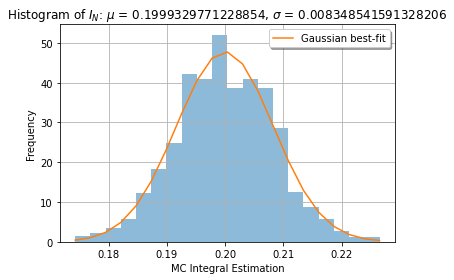

In [ ]:
from matplotlib import colors 
from matplotlib.ticker import PercentFormatter  
 
import scipy.stats

_, bins, _ = plt.hist(results, 20, density=1, alpha=0.5)
mu, sigma = scipy.stats.norm.fit(results) 
 
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma) 
plt.plot(bins, best_fit_line, label = 'Gaussian best-fit') 
plt.xlabel('MC Integral Estimation')
plt.ylabel('Frequency')
plt.legend(shadow = True)
plt.title(f'Histogram of $I_N$: $\mu$ = {mu}, $\sigma$ = {sigma}')
plt.grid() 
plt.show()

In [ ]:
# from scipy.stats import norm
# import matplotlib.mlab as mlab
# import matplotlib.pyplot as plt

# # best fit of data
# (mu, sigma) = norm.fit(results)

# # the histogram of the data
# n, bins, patches = plt.hist(results, 20, density=1, alpha=0.5)

# best_fit_line = norm.pdf(bins, mu, sigma)


# #plot
# plt.plot(bins, best_fit_line, label = 'Gaussian best-fit')
# plt.xlabel('MC Integral Estimation')
# plt.ylabel('Frequency')
# plt.legend(shadow = True)
# plt.title(r'$\mathrm{Histogram of $I_N$:}\ \mu=%.5f,\ \sigma=%.5f$' %(mu, sigma))
# plt.grid(True)

# plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


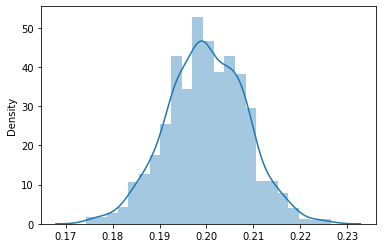

In [ ]:
import seaborn as sns
sns.distplot(results)

In [ ]:
print(mu)
print(sigma)

0.1999329771228854
0.008348541591328206


**c)**
Improve your Monte-Carlo integrator using importance sampling. As sampling distributions, use $g(x) = 2x, 3x^2, 4x^3$ and $5x^4$. For each $g(x)$, calculate $I_N$ and $σ_N$ as
above and report your results (e.g. in a table or plot). Additionally, make a $log-log$
plot of $σ_N$ versus $N$ for each $g(x)$. Discuss your results. (8 points)

In [ ]:
def weights(g, x, N):
  sum = 0.0
  weight = np.zeros(N)
  for i in range(N):
    weight[i] = g(x[i])
    sum = sum + weight[i]
  weight = weight/sum
  return weight

g1 = lambda x: 2*x
g2 = lambda x: 3*x**2
g3 = lambda x: 4*x**3
g4 = lambda x: 5*x**4

In [ ]:
def Importance_MC(f, g, x, N):
  f_sum = 0
  for i in range(N):
    f_sum = f_sum + f(x[i])/g(x[i])
  result = (b-a)*f_sum/N
  return f_sum, result

In [ ]:
N = 1000

In [ ]:
from scipy import stats       #sampling according to x ~ g(x)
xk = np.arange(N)
pk1 = weights(g1, xk, N)
custm1 = stats.rv_discrete(name='custom', values=(xk, pk1))
sample1 = custm1.rvs(size = N)/N 

pk2 = weights(g2, xk, N)
custm2 = stats.rv_discrete(name='custom', values=(xk, pk2))
sample2 = custm2.rvs(size = N)/N

pk3 = weights(g3, xk, N)
custm3 = stats.rv_discrete(name='custom', values=(xk, pk3))
sample3 = custm3.rvs(size = N)/N

pk4 = weights(g3, xk, N)
custm4 = stats.rv_discrete(name='custom', values=(xk, pk4))
sample4 = custm4.rvs(size = N)/N

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


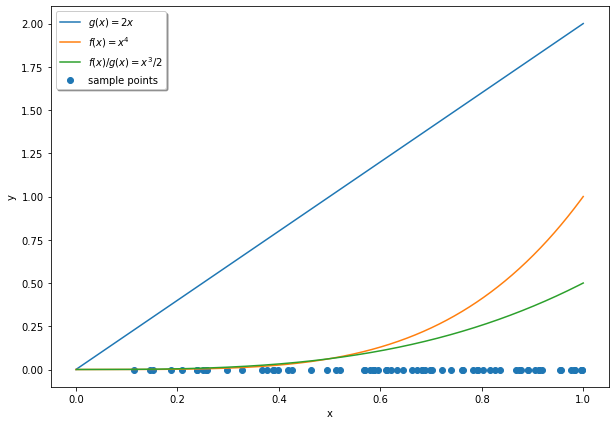

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.scatter(sample1[:70], np.zeros(70), label='sample points')
plt.plot(np.linspace(0, 1, 1000), g1(np.linspace(0, 1, 1000)), label = '$g(x)=2x$')
plt.plot(np.linspace(0, 1, 1000), f(np.linspace(0, 1, 1000)), label = '$f(x)=x^4$')
plt.plot(np.linspace(0, 1, 1000), f(np.linspace(0, 1, 1000))/g1(np.linspace(0, 1, 1000)), label = '$f(x)/g(x)=x^3/2$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(shadow = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


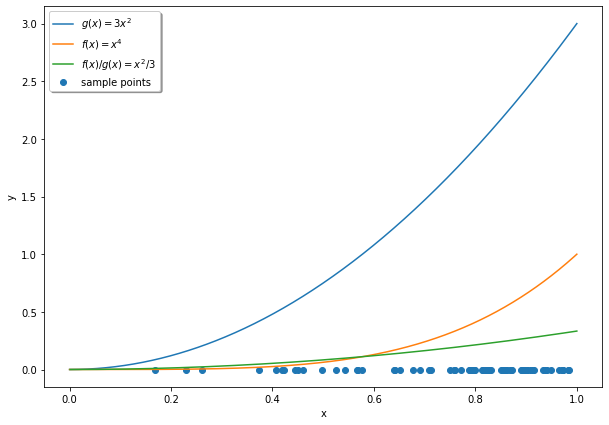

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.scatter(sample2[:70], np.zeros(70), label='sample points')
plt.plot(np.linspace(0, 1, 1000), g2(np.linspace(0, 1, 1000)), label = '$g(x)=3x^2$')
plt.plot(np.linspace(0, 1, 1000), f(np.linspace(0, 1, 1000)), label = '$f(x)=x^4$')
plt.plot(np.linspace(0, 1, 1000), f(np.linspace(0, 1, 1000))/g2(np.linspace(0, 1, 1000)), label = '$f(x)/g(x)=x^2/3$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(shadow = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


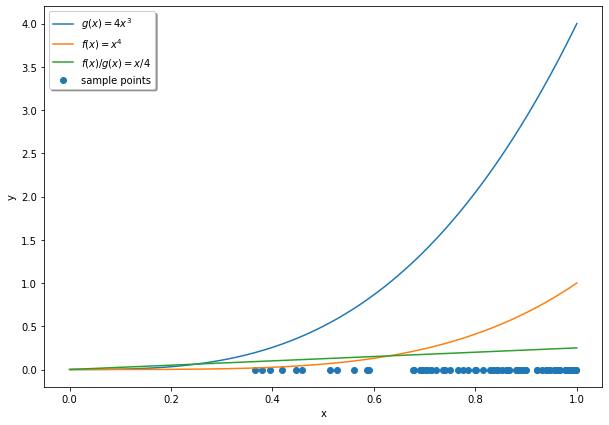

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.scatter(sample3[:70], np.zeros(70), label='sample points')
plt.plot(np.linspace(0, 1, 1000), g3(np.linspace(0, 1, 1000)), label = '$g(x)=4x^3$')
plt.plot(np.linspace(0, 1, 1000), f(np.linspace(0, 1, 1000)), label = '$f(x)=x^4$')
plt.plot(np.linspace(0, 1, 1000), f(np.linspace(0, 1, 1000))/g3(np.linspace(0, 1, 1000)), label = '$f(x)/g(x)=x/4$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(shadow = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


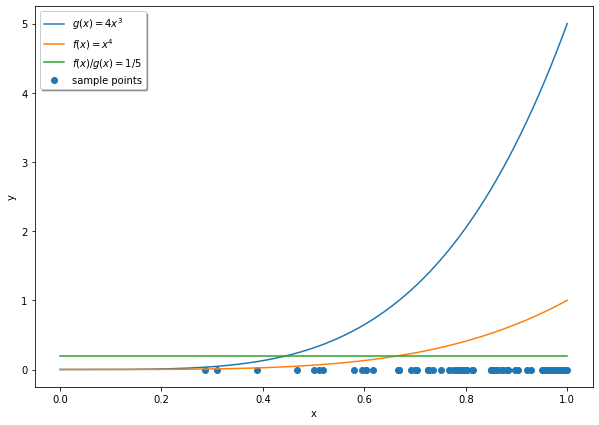

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.scatter(sample4[:70], np.zeros(70), label='sample points')
plt.plot(np.linspace(0, 1, 1000), g4(np.linspace(0, 1, 1000)), label = '$g(x)=4x^3$')
plt.plot(np.linspace(0, 1, 1000), f(np.linspace(0, 1, 1000)), label = '$f(x)=x^4$')
plt.plot(np.linspace(0, 1, 1000), f(np.linspace(0, 1, 1000))/g4(np.linspace(0, 1, 1000)), label = '$f(x)/g(x)=1/5$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(shadow = True)

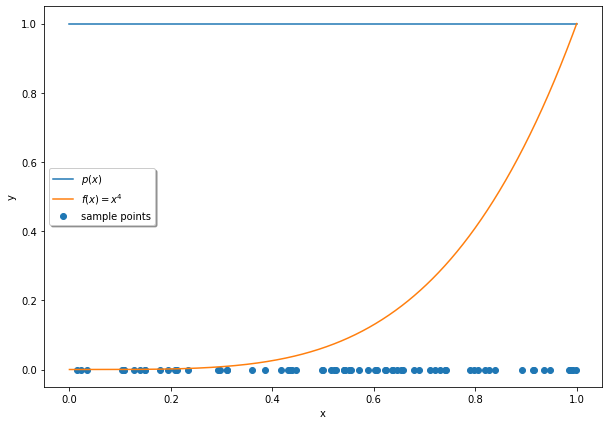

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.scatter(np.random.uniform(0, 1,70), np.zeros(70),label='sample points')
plt.plot(np.linspace(0, 1, 1000), np.ones(1000), label = '$p(x)$')
plt.plot(np.linspace(0, 1, 1000), f(np.linspace(0, 1, 1000)), label = '$f(x)=x^4$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(shadow = True)

In [ ]:
sample1[300:350]

array([0.894, 0.621, 0.944, 0.622, 0.631, 0.738, 0.664, 0.999, 0.564,
       0.363, 0.724, 0.791, 0.474, 0.625, 0.797, 0.957, 0.506, 0.874,
       0.865, 0.558, 0.814, 0.857, 0.966, 0.746, 0.58 , 0.93 , 0.337,
       0.799, 0.812, 0.978, 0.604, 0.79 , 0.703, 0.758, 0.478, 0.766,
       0.082, 0.864, 0.697, 0.709, 0.927, 0.893, 0.942, 0.439, 0.524,
       0.728, 0.931, 0.813, 0.86 , 0.444])

In [ ]:
def Importance_MC_sigma(f, g, x, N):     # x is a sample of N points randomly sampled according to g(x)
  sigma_N = []                           # storing errors for each sample size from 1 to N=1000
  f_sum = 0
  f_squared_sum = 0

  for i in range(N):
    f_sum = f_sum + f(x[i])/g(x[i])
    f_ave_squared = np.power(f_sum/(i+1),2)
    f_squared_sum = f_squared_sum + np.power(f(x[i])/g(x[i]), 2)
    f_squared_ave = f_squared_sum/(i+1) 
    
    if i==0:
      sigma_N.append((b-a)*np.sqrt(f_squared_ave - f_ave_squared))        #error when N = 1
    if i!=0:
      sigma_N.append((b-a)*np.sqrt((f_squared_ave - f_ave_squared)/i))    #error for N>1

  result = (b-a)*f_sum/N
  return sigma_N, result

[0.06493702950000001, 0.03847648290217634, 0.04752587958588934, 0.03950653142931097, 0.03848396582903444, 0.05087716125430593, 0.04440498475391204, 0.05128073869456027, 0.04649757075693634, 0.04539617016933877, 0.04882063262385998, 0.04940601236605099, 0.04624235195312801, 0.04525502797290927, 0.045231697767642465, 0.04250862745131928, 0.04025518634058321, 0.038432373563112514, 0.03700688390195359, 0.0366971231074142, 0.035632391317857844, 0.03497628336054086, 0.03448207765887014, 0.033112703808661506, 0.03200004681797446, 0.03151027332616959, 0.030874854626371902, 0.030106239986552444, 0.029169701802326205, 0.028225064111229402, 0.027700114823345622, 0.02734909956087147, 0.026692137759013225, 0.02748858118188673, 0.026850091884391906, 0.026119019845109268, 0.025856358454653644, 0.025681926111514052, 0.025100116542165773, 0.024480307746121203, 0.02422567182439475, 0.024029505418923208, 0.023559170712173526, 0.02350629888461848, 0.023292991459508455, 0.023001536409552076, 0.022717176206

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


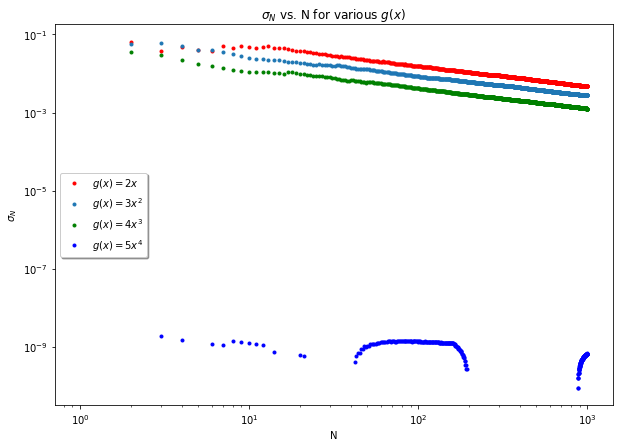

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
sigmaN1, res1 = Importance_MC_sigma(f, g1, sample1, N)
sigmaN2, res2 = Importance_MC_sigma(f, g2, sample2, N)
sigmaN3, res3 = Importance_MC_sigma(f, g3, sample3, N)
sigmaN4, res4 = Importance_MC_sigma(f, g4, sample4, N)
print(sigmaN1[1:], res1)
plt.loglog(np.arange(1, N+1),sigmaN1,'r.', label = '$g(x)=2x$')
plt.loglog(np.arange(1, N+1),sigmaN2, '.', label = '$g(x)=3x^2$')
plt.loglog(np.arange(1, N+1),sigmaN3,'g.', label = '$g(x)=4x^3$')
plt.loglog(np.arange(1, N+1),sigmaN4,'b.', label = '$g(x)=5x^4$')
plt.xlabel('N')
plt.ylabel('$\sigma_N$')
plt.title('$\sigma_N$ vs. N for various $g(x)$')
plt.legend(loc = 'center left', shadow = True)

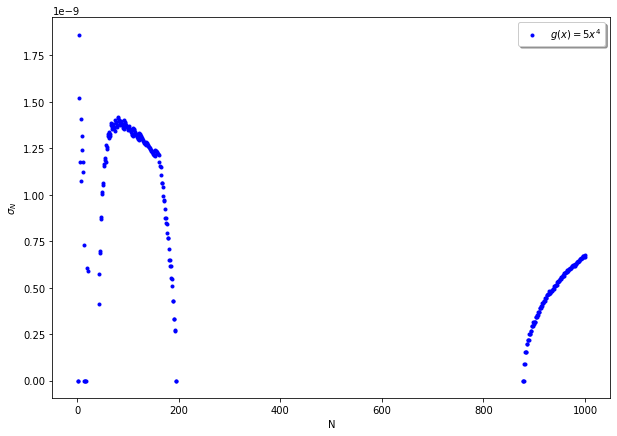

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(np.arange(1, N+1),sigmaN4,'b.', label = '$g(x)=5x^4$')
plt.xlabel('N')
plt.ylabel('$\sigma_N$')
plt.legend(shadow = True)

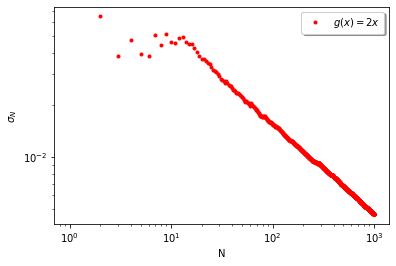

In [ ]:
plt.loglog(np.arange(1, N+1),sigmaN1,'r.', label = '$g(x)=2x$')
plt.xlabel('N')
plt.ylabel('$\sigma_N$')
plt.legend(shadow = True)

In [ ]:
def Importance_MC(f, g, x, N):
  f_sum = 0
  for i in range(N):
    f_sum = f_sum + f(x[i])/g(x[i])
  result = (b-a)*f_sum/N
  return f_sum, result

In [ ]:
def Importance_sigma_N(f, g, x, a, b, N, f_sum):
  f_squared_sum = 0
  for i in range(N):
    f_squared_sum = f_squared_sum + np.power(f(x[i])/g(x[i]), 2)
  f_squared_ave = f_squared_sum/N  
  f_ave_squared = np.power(f_sum/N,2)
  sigma = (b-a)*np.sqrt((f_squared_ave - f_ave_squared)/(N-1))
  return sigma

In [ ]:
sum1, I1 = Importance_MC(f, g1, sample1, N)
sum2, I2 = Importance_MC(f, g2, sample2, N)
sum3, I3 = Importance_MC(f, g3, sample3, N)
sum4, I4 = Importance_MC(f, g4, sample4, N)

print(I1, I2, I3, I4)

0.19087691095799986 0.2013930463333333 0.19972574999999945 0.19999999999999718


In [ ]:
sigma1 = Importance_sigma_N(f, g1, sample1, 0, 1, N, sum1)
sigma2 = Importance_sigma_N(f, g2, sample2, 0, 1, N, sum2)
sigma3 = Importance_sigma_N(f, g3, sample3, 0, 1, N, sum3)
sigma4 = Importance_sigma_N(f, g4, sample4, 0, 1, N, sum4)
print(sigma1, sigma2, sigma3, sigma4)

0.004659242384061702 0.0027454138789298494 0.001253008032123638 6.770712097563727e-10


In [ ]:
# domain = np.linspace(0,1,1000,endpoint=False)
# w = weights(g1, domain, 1000)
# np.random.choice(domain, 1000, p = w)

**Problem 2. Random Walk in 2D**

**a)** Implement a random walk in two dimensions. The random walk should start at the origin, $(x0, y0) = (0, 0)$. For each step, choose uniform random values for $∆x′$ and $∆y′$ in the range $[−1, 1)$. Then normalise the step to be of unit length:

$$\Delta{x} = \frac{1}{L}\Delta{x'} \quad \Delta{y} = \frac{1}{L}\Delta{y'} \quad L = \sqrt{\Delta{x'}^2+\Delta{y'}^2}$$

Draw 2D plots of three independent random walks, each with $N = 1000$ steps.


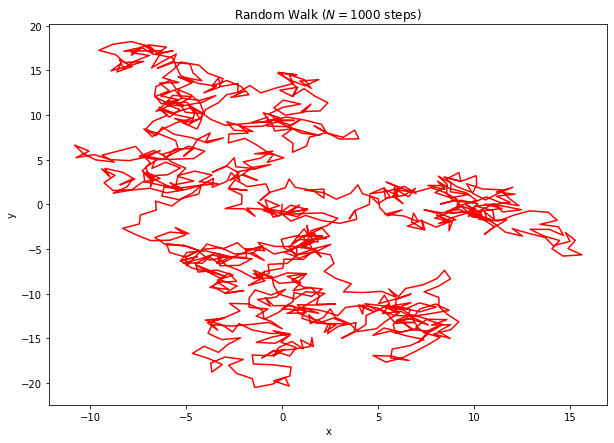

In [ ]:
import pylab

N = 1000

x = np.zeros(N+1)
y = np.zeros(N+1)

for i in range(1,N+1):
  delta_x = np.random.uniform(-1, 1)
  delta_y = np.random.uniform(-1, 1)
  norm = np.sqrt(delta_x**2 + delta_y**2)
  x[i] = x[i-1] + delta_x/norm
  y[i] = y[i-1] + delta_y/norm

fig, ax = pylab.subplots(figsize=(10, 7))
pylab.title("Random Walk ($N = " + str(N) + "$ steps)")
pylab.plot(x, y, 'r')
pylab.xlabel('x')
pylab.ylabel('y')
pylab.savefig('fig_2_1')
pylab.show()


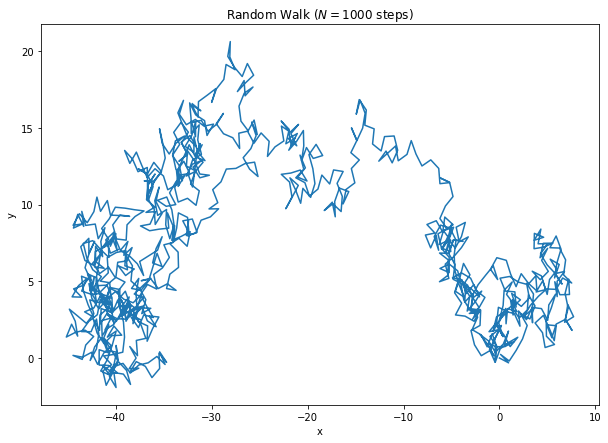

In [ ]:
x = np.zeros(N+1)
y = np.zeros(N+1)

for i in range(1,N+1):
  delta_x = np.random.uniform(-1, 1)
  delta_y = np.random.uniform(-1, 1)
  norm = np.sqrt(delta_x**2 + delta_y**2)
  x[i] = x[i-1] + delta_x/norm
  y[i] = y[i-1] + delta_y/norm

fig, ax = pylab.subplots(figsize=(10, 7))
pylab.title("Random Walk ($N = " + str(N) + "$ steps)")
pylab.plot(x, y)
pylab.xlabel('x')
pylab.ylabel('y')
pylab.show()

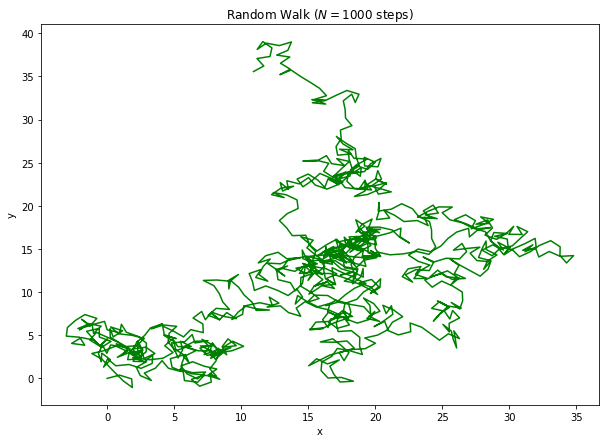

In [ ]:
N = 1000
x = np.zeros(N+1)
y = np.zeros(N+1)

for i in range(1,N+1):
  delta_x = np.random.uniform(-1, 1)
  delta_y = np.random.uniform(-1, 1)
  norm = np.sqrt(delta_x**2 + delta_y**2)
  x[i] = x[i-1] + delta_x/norm
  y[i] = y[i-1] + delta_y/norm

fig, ax = pylab.subplots(figsize=(10, 7))
pylab.title("Random Walk ($N = " + str(N) + "$ steps)")
pylab.plot(x, y, 'g')
pylab.xlabel('x')
pylab.ylabel('y')
pylab.show()

In [ ]:
np.sqrt(x[N]**2 + y[N]**2)

20.453284417936043

**b)** Now perform $M = 1000$ independent simulations with $N = 10000$. Plot a histogram of the distance from the origin after the last step, $R_N$ . Compare the root-mean-square distance $R_{rms,N}=\sqrt{⟨R^2⟩_N}$ to the theoretical expectation of $R_{rms}=\sqrt{N}r_{rms}$ for large $N$, where $r_{rms} = 1 $ given our unit step size. (4 points)

In [ ]:
M = 1000
N = 10000

distance = np.zeros(M)

for j in range(M):
  x = np.zeros(N+1)
  y = np.zeros(N+1)

  for i in range(1, N+1):
    delta_x = np.random.uniform(-1, 1)
    #deltas_x[i-1] = delta_x
    delta_y = np.random.uniform(-1, 1)
    #deltas_y[i-1] = delta_y
    norm = np.sqrt(delta_x**2 + delta_y**2)
    x[i] = x[i-1] + delta_x/norm
    y[i] = y[i-1] + delta_y/norm

  distance[j] = np.sqrt(x[N]**2 + y[N]**2)

Text(0.5, 1.0, 'Frequency distribution of $R_N$ for M = 1000')

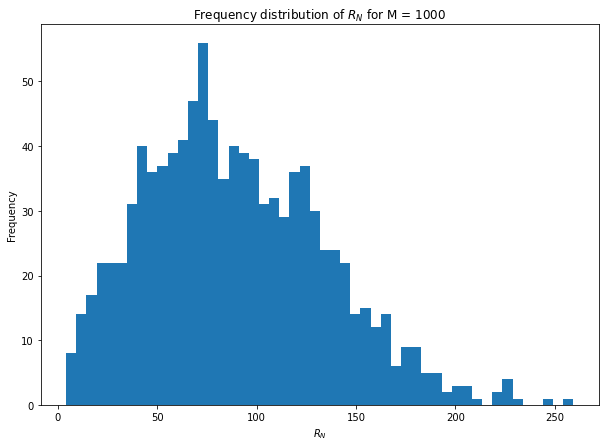

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.hist(distance, 50)
plt.xlabel('$R_N$')
plt.ylabel('Frequency')
plt.title('Frequency distribution of $R_N$ for M = 1000')

In [ ]:
N = 100000
x = np.zeros(N+1)
y = np.zeros(N+1)
deltas_x = np.zeros(N+1)
deltas_y = np.zeros(N+1)

for i in range(1, N+1):
  delta_x = np.random.uniform(-1, 1)
  #deltas_x[i-1] = delta_x
  delta_y = np.random.uniform(-1, 1)
  #deltas_y[i-1] = delta_y
  norm = np.sqrt(delta_x**2 + delta_y**2)
  deltas_x[i-1] = delta_x/norm
  deltas_y[i-1] = delta_y/norm
  x[i] = x[i-1] + delta_x/norm
  y[i] = y[i-1] + delta_y/norm

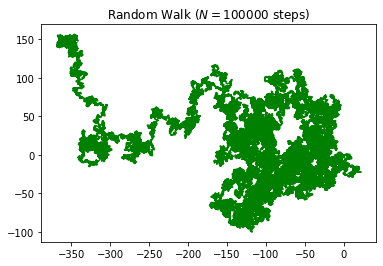

In [ ]:
pylab.title("Random Walk ($N = " + str(N) + "$ steps)")
pylab.plot(x, y, 'g')
pylab.show()

In [ ]:
#R_rms
np.sqrt(np.sum(np.power(deltas_x,2))+np.sum(np.power(deltas_y,2)))

316.22776601683796

In [ ]:
np.sqrt(np.power(np.sum(deltas_x),2)+np.power(np.sum(deltas_y),2))

388.89319908993764

In [ ]:
np.sqrt(N)

316.22776601683796

In [ ]:
N = 1000
x = np.zeros(N+1)
y = np.zeros(N+1)
deltas_x = np.zeros(N+1)
deltas_y = np.zeros(N+1)

for i in range(1, N+1):
  delta_x = np.random.uniform(-1, 1)
  deltas_x[i-1] = delta_x
  delta_y = np.random.uniform(-1, 1)
  deltas_y[i-1] = delta_y
  norm = np.sqrt(delta_x**2 + delta_y**2)
  x[i] = x[i-1] + delta_x/norm
  y[i] = y[i-1] + delta_y/norm

In [ ]:
np.sqrt(np.sum(np.power(deltas_x,2))+np.sum(np.power(deltas_y,2)))

26.1735977513615

In [ ]:
np.sqrt(np.power(np.sum(deltas_x),2)+np.power(np.sum(deltas_y),2))

30.70239636909612

In [ ]:
np.sqrt(1000)

31.622776601683793

**Problem 3. Protein Folding as a Self-Avoiding Random Walk**

A protein is a large molecule made up of a chain of building blocks called monomers. Let us consider one containing two different monomers. One is a non-polar hydrophobic (H) monomer that is repelled by the surrounding water. The other is a polar (P) monomer that is attracted by the water. The spatial structure of the protein results from a folding process in which random coils of chains rearrange themselves into a configuration of minimum energy E.

Our goal now is to create a variation on the random walk problem that models the folding process and produces the lowest energy state of a H–P-sequence of various lengths, see Fig. 1. The random walk can only visit the nodes of a regular 2D square lattice, and each node can only be visited once, i.e. the random walk is self-avoiding. We take the energy of the protein to be $E = −\epsilon f$, where $\epsilon$ is a positive constant, and f is the number of H–H neighbours on the lattice that are not direct neighbours on the chain. Accordingly, we expect the natural states of H–P sequences to be those with the largest possible number f of H–H contacts.

Implement the described model as follows:

1.   Set up the random walk on a regular 2D square lattice with 31 grid points in each dimension. If the point (1, 1) denotes the corner in the lower left, then (16, 16) is the centre of the grid. Begin by placing a random monomer at the centre. For the probability of an H monomer, use $p_H = 0.7$. Accordingly, the probability of a P monomer is $p_P = 1 − p_H = 0.3$.
2. Take a step in a random direction. After each step, choose a monomer at random,
using the same probabilities pH and pP, and place the monomer on the new lattice
site.
3. Restrict the walk such that the positions available for each step are the empty
neighbouring sites.
4. The walk stops if there are no empty sites available. Record the energy E and the length $L$ of the chain.

Run $M = 1000$ such simulations, and plot histograms of the resulting energies $E$ and $L$. What is the minimum E found? Plot the proteins for three selected simulations (e.g. with a small, intermediate and large number of H–H links). Finally, plot a heatmap (i.e. a 2D-histogram) of the resulting values for E and L. What does this tell us about the correlation of the two quantities?

In [ ]:
import numpy as np

In [ ]:
def protein_folding():
  directions = np.array([[1, 0], [-1,0], [0, 1], [0, -1]])
  grid = np.zeros((31, 31), dtype = object)
  grid[16][16] = (1, np.random.choice([1, 0], p = [0.7, 0.3]))
  x = [16]
  y = [16]

  xy = [(16, 16)]

  monomers = [grid[16][16][1]]

  stop = 0

  i = 16
  j = 16

  while stop != 1:
    options = []
    for k in range(4):
      if (0 <= i+directions[k][0] < 31) and (0 <= j+directions[k][1] < 31):
        if grid[i+directions[k][0]][j+directions[k][1]] == 0:
          options.append(directions[k])
    if len(options) == 0:
        stop = 1
        break
    #print(options)
    step = options[np.random.randint(len(options))]
    i = i+step[0]
    j = j+step[1]
    grid[i][j] = (1, np.random.choice([1, 0], p = [0.7, 0.3]))  
    x.append(i)
    y.append(j)
    xy.append((i, j))
    monomers.append(grid[i][j][1])
  return x, y, xy, monomers, grid

In [ ]:
def count_HH(x, y, xy, grid):
 # directions = [[1, 0], [-1,0], [0, 1], [0, -1]]
  #print(directions[1][0])
  L = len(x)
  #print(L)

  i = 0

  count_links = 0

  while i < L:
    if grid[x[i]][y[i]][1] == 0:
      i = i+1
      if i ==L:
        break
    if (0 <= x[i] < 31) and (0<= y[i] < 31):
      #print(i)
      if grid[x[i]][y[i]][1] == 1:  #if it is H
        for k in [[1, 0], [-1,0], [0, 1], [0, -1]]:
          x_i = x[i]+k[0]
          y_i = y[i]+k[1]
          if (0 <= x_i < 31) and (0<= y_i < 31):
            if grid[x_i][y_i] == (1,1):   # if H
              delta_index = xy.index((x_i, y_i)) - xy.index((x[i], y[i]))
              if delta_index > 1:
                count_links = count_links+1
        i = i+1
        if i==L:
          break

  return count_links

In [ ]:
M = 1000
lengths = []
energies = []

grids = []
for i in range(M):
  x, y, xy, monomers, grid = protein_folding()
  grids.append([x, y, monomers, grid])
  lengths.append(len(x)-1)
  energies.append(-count_HH(x, y, xy, grid))

In [ ]:
index = energies.index(max(energies))
x, y, monomers, grid = grids[index][0], grids[index][1], grids[index][2], grids[3]

In [ ]:
monomers_labels = ['H' if item == 1 else 'P' for item in monomers]

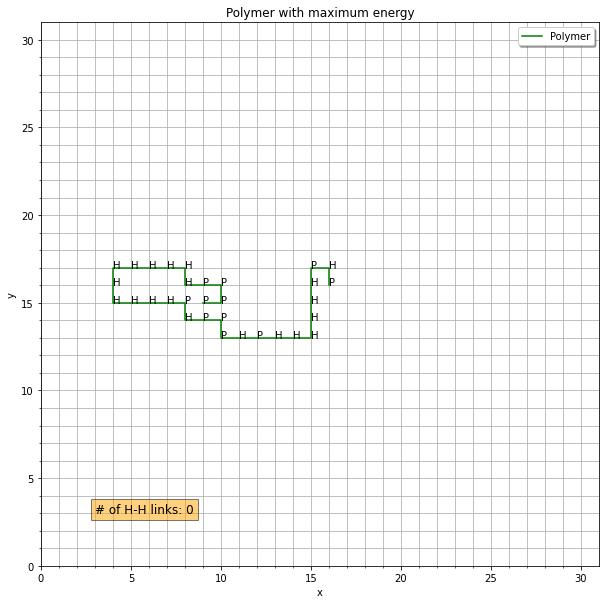

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x, y, 'g', label = 'Polymer') 

for i, txt in enumerate(monomers_labels): 
    ax.annotate(txt, (x[i], y[i])) 

plt.xlim([0, 31])
plt.ylim([0, 31])
major_ticks = np.arange(0, 31, 5)
minor_ticks = np.arange(0, 31, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')
#plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.text(3, 3, s = f'# of H-H links: {-max(energies)}', fontsize = 12, 
         bbox = dict(facecolor = 'orange', alpha = 0.5))
plt.title('Polymer with maximum energy')
plt.legend(shadow = True)
plt.show()

In [ ]:
index = energies.index(min(energies))
print(min(energies))
x, y, monomers = grids[index][0], grids[index][1], grids[index][2]

-52


In [ ]:
monomers_labels = ['H' if item == 1 else 'P' for item in monomers]

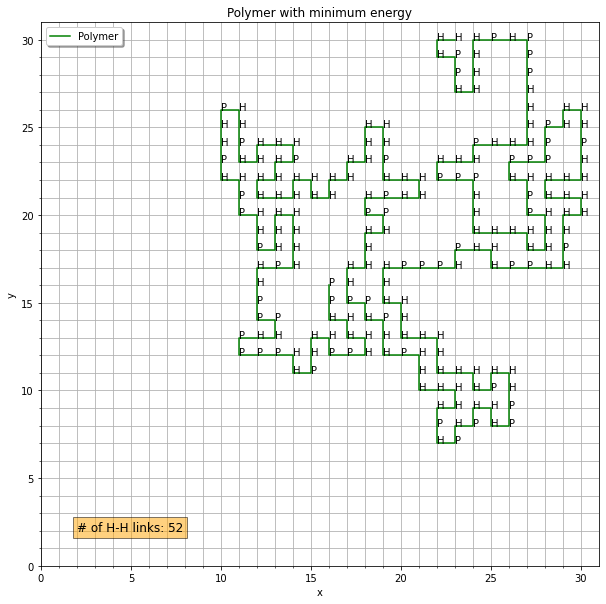

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x, y, 'g', label = 'Polymer') 

for i, txt in enumerate(monomers_labels): 
    ax.annotate(txt, (x[i], y[i])) 

plt.xlim([0, 31])
plt.ylim([0, 31])
major_ticks = np.arange(0, 31, 5)
minor_ticks = np.arange(0, 31, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')
#plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.text(2, 2, s = f'# of H-H links: {-min(energies)}', fontsize = 12, 
         bbox = dict(facecolor = 'orange', alpha = 0.5))
plt.title('Polymer with minimum energy')
plt.legend(shadow = True)
plt.show()

In [ ]:
import statistics as stat
m = stat.median(energies)

In [ ]:
index = energies.index(m)
x, y, monomers = grids[index][0], grids[index][1], grids[index][2]

In [ ]:
monomers_labels = ['H' if item == 1 else 'P' for item in monomers]

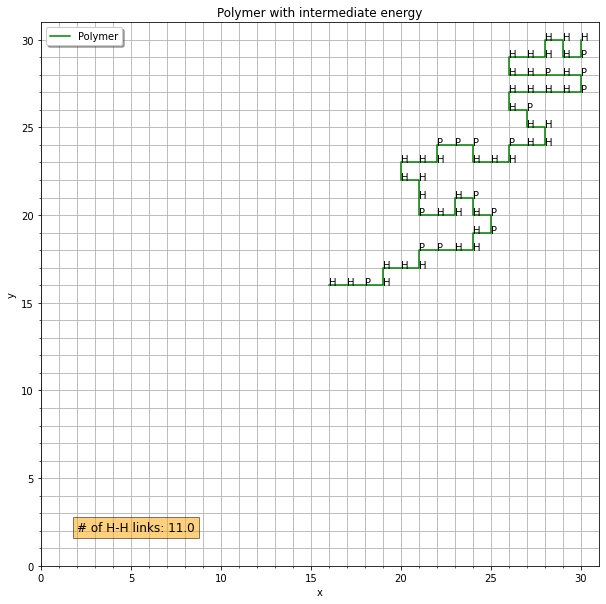

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x, y, 'g', label = 'Polymer') 

for i, txt in enumerate(monomers_labels): 
    ax.annotate(txt, (x[i], y[i])) 

plt.xlim([0, 31])
plt.ylim([0, 31])
major_ticks = np.arange(0, 31, 5)
minor_ticks = np.arange(0, 31, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')
#plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.text(2, 2, s = f'# of H-H links: {-m}', fontsize = 12, 
         bbox = dict(facecolor = 'orange', alpha = 0.5))
plt.title('Polymer with intermediate energy')
plt.legend(shadow = True)
plt.show()

In [ ]:
index = lengths.index(max(lengths))
print(max(lengths))
x, y, monomers = grids[index][0], grids[index][1], grids[index][2]

286


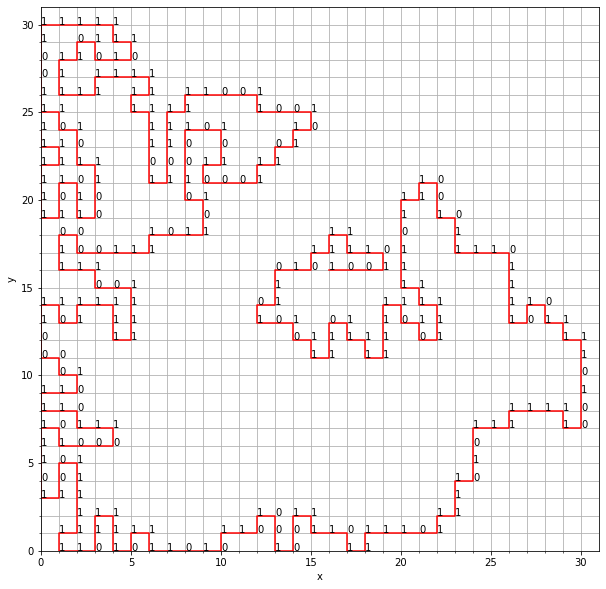

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x, y, 'r') 

for i, txt in enumerate(monomers): 
    ax.annotate(txt, (x[i], y[i])) 

plt.xlim([0, 31])
plt.ylim([0, 31])
major_ticks = np.arange(0, 31, 5)
minor_ticks = np.arange(0, 31, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')
#plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
index = lengths.index(min(lengths))
x, y, monomers = grids[index][0], grids[index][1], grids[index][2]

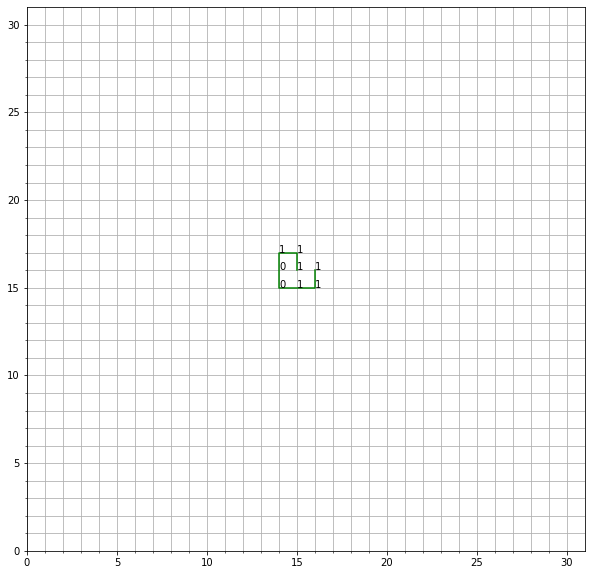

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x, y, 'g') 

for i, txt in enumerate(monomers): 
    ax.annotate(txt, (x[i], y[i])) 

plt.xlim([0, 31])
plt.ylim([0, 31])
major_ticks = np.arange(0, 31, 5)
minor_ticks = np.arange(0, 31, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')
#plt.legend()
plt.show()

In [ ]:
min(energies)

-52

Text(0, 0.5, 'Frequency')

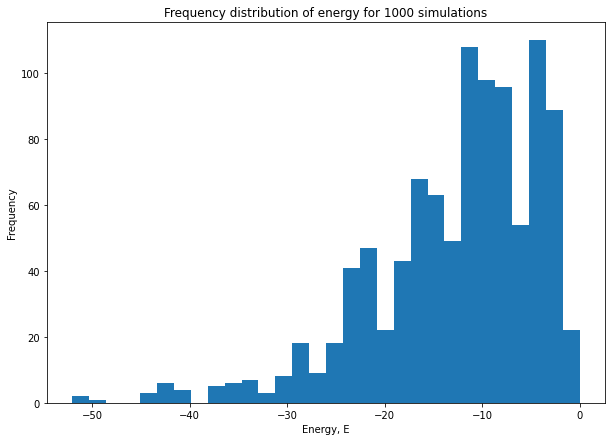

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.hist(energies, 30)
plt.title('Frequency distribution of energy for 1000 simulations')
plt.xlabel('Energy, E')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

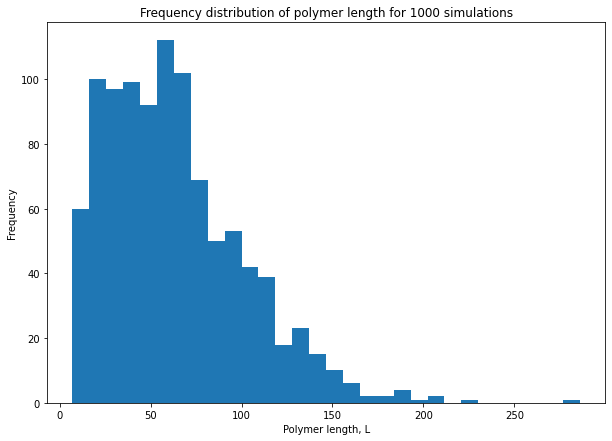

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.hist(lengths, 30)
plt.title('Frequency distribution of polymer length for 1000 simulations')
plt.xlabel('Polymer length, L')
plt.ylabel('Frequency')

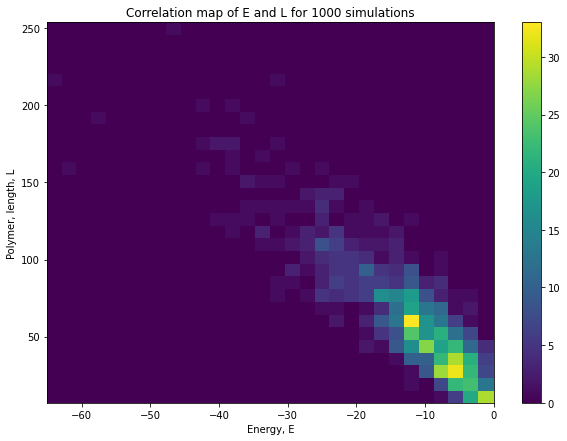

In [ ]:
fig = plt.subplots(figsize =(10, 7))
# Creating plot
plt.hist2d(energies, lengths, bins = 30)
plt.title("Correlation map of E and L for 1000 simulations")
plt.colorbar()
plt.xlabel('Energy, E')
plt.ylabel('Polymer, length, L')
# plt.ylim([0, 300])
# plt.xlim([-70, 0])

  
# show plot
plt.show()

**Problem 4. Radioactive decay**

Imagine having a sample of $N(t)$ radioactive nuclei at time $t$. Simulate the decay of the sample by increasing the time $t$ in discrete steps of $\Delta{t}$, and at each time count how many nuclei have decayed during the last $\Delta{t}$ interval. The simulation quits when there are no nuclei left. The probability of a nucleus to decay per unit of time should be $\lambda = 0.03 s^{−1}$
.

**a)** Repeat the simulation for $N(0) = 10, 100, 1000, 10000$ and $100000$, and plot the $log N(t)$ versus time $t$ in a single plot. Also add the theory lines for the continuous decay model (for which $N → \infty$ and $\Delta{t} \to 0$ is assumed), i.e. $N_{cont}(t) = N(0)e^{−\lambdat}$.
Approximately, for which $log N$ do the simulation results begin to appear stochastic (instead of approximating an exponential)? (4 points)


In [ ]:
def cont_decay(N0, t, p):
  return N0*np.exp(-p*t)

In [ ]:
p = 0.03

In [ ]:
N = [10, 100, 1000, 10000, 100000]

In [ ]:
def random_decay(N, s, p):
  population = []
  q = 1-p # survival probability
  for t in range(s): #dt = 1
    r = np.random.random(N)
    survive = np.sum(r<q)  #not decayed atoms
    population.append(survive)
    N = survive
  return population

In [ ]:
def random_decay2(N, s, p):
  population = []
  q = 1-p # survival probability
  for t in np.arange(0, s, 0.5): #dt = 1
    r = np.random.random(N)
    survive = np.sum(r<q)  #not decayed atoms
    population.append(survive)
    N = survive
  return population

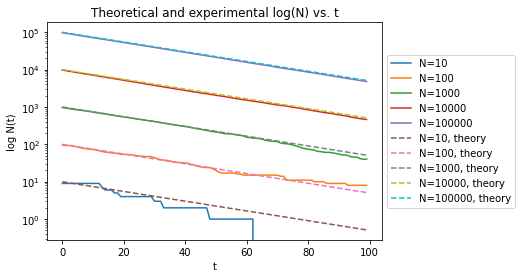

In [ ]:
s=100 #timescale
ax = plt.figure()
ax = plt.subplot(111)
plt.semilogy()
ax.plot(range(s), random_decay(N[0], s,  p), label='N=10')
ax.plot(range(s), random_decay(N[1], s,  p), label='N=100')
ax.plot(range(s), random_decay(N[2], s,  p), label='N=1000')
ax.plot(range(s), random_decay(N[3], s,  p), label='N=10000')
ax.plot(range(s), random_decay(N[4], s,  p), label='N=100000')
ax.plot(range(s), cont_decay(N[0], np.arange(s), p), '--', label='N=10, theory')
ax.plot(range(s), cont_decay(N[1], np.arange(s), p), '--', label='N=100, theory')
ax.plot(range(s), cont_decay(N[2], np.arange(s), p), '--', label='N=1000, theory')
ax.plot(range(s), cont_decay(N[3], np.arange(s), p), '--', label='N=10000, theory')
ax.plot(range(s), cont_decay(N[4], np.arange(s), p), '--', label='N=100000, theory')
ax.legend(shadow = True)
plt.xlabel('t')
plt.ylabel('log N(t)')
# Shrink current axis by 20%
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Theoretical and experimental log(N) vs. t')
plt.savefig('1.png')

plt.show()

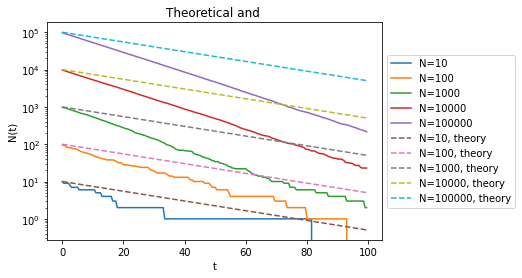

In [ ]:
s=100 #timescale
fig = plt.figure()
ax = plt.subplot(111)
plt.semilogy()
ax.plot(np.arange(0, s, 0.5), random_decay2(N[0], s,  p), label='N=10')
ax.plot(np.arange(0, s, 0.5), random_decay2(N[1], s,  p), label='N=100')
ax.plot(np.arange(0, s, 0.5), random_decay2(N[2], s,  p), label='N=1000')
ax.plot(np.arange(0, s, 0.5), random_decay2(N[3], s,  p), label='N=10000')
ax.plot(np.arange(0, s, 0.5), random_decay2(N[4], s,  p), label='N=100000')
ax.plot(np.arange(0, s, 0.5), cont_decay(N[0], np.arange(0, s, 0.5), p), '--', label='N=10, theory')
ax.plot(np.arange(0, s, 0.5), cont_decay(N[1], np.arange(0, s, 0.5), p), '--', label='N=100, theory')
ax.plot(np.arange(0, s, 0.5), cont_decay(N[2], np.arange(0, s, 0.5), p), '--', label='N=1000, theory')
ax.plot(np.arange(0, s, 0.5), cont_decay(N[3], np.arange(0, s, 0.5), p), '--', label='N=10000, theory')
ax.plot(np.arange(0, s, 0.5), cont_decay(N[4], np.arange(0, s, 0.5), p), '--', label='N=100000, theory')
ax.legend(shadow = True)
plt.xlabel('t')
plt.ylabel('N(t)')
# Shrink current axis by 20%
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Theoretical and ')

plt.show()

In [ ]:
random_decay(N[4], 100,  p)[66]

12849

**b)** Repeat the simulations and plotting as in part a), but using $\lambda = 0.3 s^{−1}$. What do you observe? Explain your finding. (2 points)

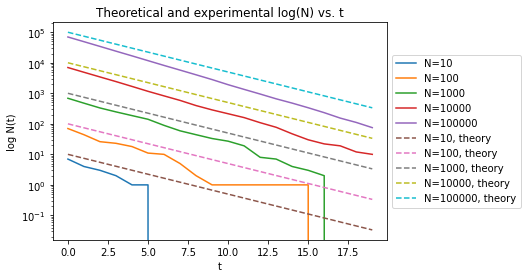

In [ ]:
p = 0.3
s = 20
fig = plt.figure()
ax = plt.subplot(111)
plt.semilogy()
ax.plot(range(s), random_decay(N[0], s,  p), label='N=10')
ax.plot(range(s), random_decay(N[1], s,  p), label='N=100')
ax.plot(range(s), random_decay(N[2], s,  p), label='N=1000')
ax.plot(range(s), random_decay(N[3], s,  p), label='N=10000')
ax.plot(range(s), random_decay(N[4], s,  p), label='N=100000')
ax.plot(range(s), cont_decay(N[0], np.arange(s), p), '--', label='N=10, theory')
ax.plot(range(s), cont_decay(N[1], np.arange(s), p), '--', label='N=100, theory')
ax.plot(range(s), cont_decay(N[2], np.arange(s), p), '--', label='N=1000, theory')
ax.plot(range(s), cont_decay(N[3], np.arange(s), p), '--', label='N=10000, theory')
ax.plot(range(s), cont_decay(N[4], np.arange(s), p), '--', label='N=100000, theory')
ax.legend(shadow = True)
plt.xlabel('t')
plt.ylabel('log N(t)')
# Shrink current axis by 20%
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Theoretical and experimental log(N) vs. t')

plt.show()

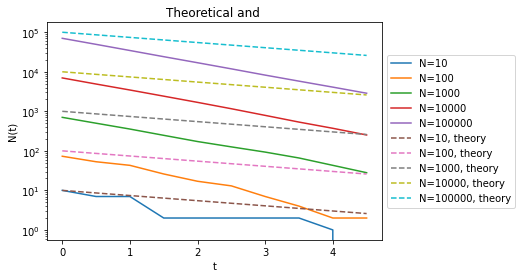

In [ ]:
p = 0.3
s = 5
fig = plt.figure()
ax = plt.subplot(111)
plt.semilogy()
ax.plot(np.arange(0, s, 0.5), random_decay2(N[0], s,  p), label='N=10')
ax.plot(np.arange(0, s, 0.5), random_decay2(N[1], s,  p), label='N=100')
ax.plot(np.arange(0, s, 0.5), random_decay2(N[2], s,  p), label='N=1000')
ax.plot(np.arange(0, s, 0.5), random_decay2(N[3], s,  p), label='N=10000')
ax.plot(np.arange(0, s, 0.5), random_decay2(N[4], s,  p), label='N=100000')
ax.plot(np.arange(0, s, 0.5), cont_decay(N[0], np.arange(0, s, 0.5), p), '--', label='N=10, theory')
ax.plot(np.arange(0, s, 0.5), cont_decay(N[1], np.arange(0, s, 0.5), p), '--', label='N=100, theory')
ax.plot(np.arange(0, s, 0.5), cont_decay(N[2], np.arange(0, s, 0.5), p), '--', label='N=1000, theory')
ax.plot(np.arange(0, s, 0.5), cont_decay(N[3], np.arange(0, s, 0.5), p), '--', label='N=10000, theory')
ax.plot(np.arange(0, s, 0.5), cont_decay(N[4], np.arange(0, s, 0.5), p), '--', label='N=100000, theory')
ax.legend(shadow = True)
plt.xlabel('t')
plt.ylabel('N(t)')
# Shrink current axis by 20%
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Theoretical and ')

plt.show()